<a href="https://colab.research.google.com/github/kiserran/academic-analytics/blob/main/MNIST_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Data Analysis with Keras

### Keras is a higher-level API within TensorFlow that makes things a lot easier. Not only is it easier to use, it's easier to tune.

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import warnings
warnings.filterwarnings('ignore')

#### A backend is a computational engine — it builds the network graph/topology, runs the optimizers, and performs the actual number crunching.  I will load up the MNIST data set. There are 60K training samples and 10K test samples.

In [ ]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

#### I need to explicitly convert the data into the format Keras / TensorFlow expects. We already know that each pixel has its unique color code and also I know that it has a maximum value of 255. To perform Machine Learning, it is important to convert all the values from 0 to 255 for every pixel to a range of values from 0 to 1. The simplest way is to divide the value of every pixel by 255 to get the values in the range of 0 to 1, after converting it into floating point values.

In [ ]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255
(train_images.shape, test_images.shape)

((60000, 784), (10000, 784))

Each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black). Let’s take a peek at one digit from the dataset. All that is needed is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using
Matplotlib’s imshow() function:

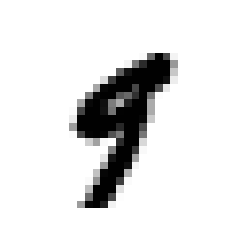

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = train_images[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
mnist_train_labels[36000]

9

Now we'll convert the 0-9 labels into "one-hot" format. Think of one_hot as a binary representation of the label data - that is, which number each handwriting sample was intended to represent. Mathematically one_hot represents a dimension for every possible label value. Every dimension is set to the value 0, except for the "correct" one which is set to 1. For example, the label vector representing the number 1 would be [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] (remember we start counting at 0.) It's just a format that's optimized for how the labels are applied during training.

So the training label data is a tensor of shape [60,000, 10] - 60,000 test images each associated with 10 binary values that indicate whether or not the image represents a given number from 0-9.

In [ ]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

Let's take a peek at one of the training images just to make sure it looks OK:

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


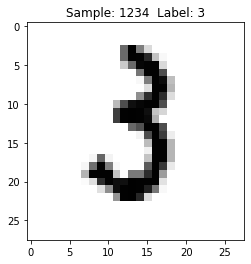

In [ ]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label
    print(train_labels[num])
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

display_sample(1234)

The input layer of 784 features feeds into a ReLU layer of 512 nodes, which then goes into 10 nodes with softmax applied. Couldn't be simpler. Our network consists of a sequence of two Dense layers, which are densely
connected (also called fully connected) neural layers. The second (and last) layer is a
10-way softmax layer, which means it will return an array of 10 probability scores (summing
to 1). Each score will be the probability that the current digit image belongs to
one of our 10 digit classes.

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

We can even get a nice description of the resulting model:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Setting up our optimizer and loss function is just as simple. We will use the RMSProp optimizer here. Other choices include Adagrad, SGD, Adam, Adamax, and Nadam. See https://keras.io/optimizers/

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Training our model is also just one line of code with Keras. Here we'll do 10 epochs with a batch size of 100. Keras is slower, and if I'm  not running on top of a GPU-accelerated Tensorflow this can take a fair amount of time (that's why I've limited it to just 10 epochs.)

In [ ]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 4s - loss: 0.2403 - acc: 0.9293 - val_loss: 0.1275 - val_acc: 0.9612
Epoch 2/10
60000/60000 - 3s - loss: 0.0967 - acc: 0.9710 - val_loss: 0.0792 - val_acc: 0.9761
Epoch 3/10
60000/60000 - 3s - loss: 0.0633 - acc: 0.9808 - val_loss: 0.0737 - val_acc: 0.9772
Epoch 4/10
60000/60000 - 3s - loss: 0.0470 - acc: 0.9857 - val_loss: 0.0696 - val_acc: 0.9778
Epoch 5/10
60000/60000 - 3s - loss: 0.0349 - acc: 0.9896 - val_loss: 0.0666 - val_acc: 0.9802
Epoch 6/10
60000/60000 - 2s - loss: 0.0274 - acc: 0.9920 - val_loss: 0.0646 - val_acc: 0.9819
Epoch 7/10
60000/60000 - 3s - loss: 0.0207 - acc: 0.9938 - val_loss: 0.0675 - val_acc: 0.9809
Epoch 8/10
60000/60000 - 2s - loss: 0.0162 - acc: 0.9951 - val_loss: 0.0785 - val_acc: 0.9790
Epoch 9/10
60000/60000 - 2s - loss: 0.0128 - acc: 0.9961 - val_loss: 0.0717 - val_acc: 0.9824
Epoch 10/10
60000/60000 - 2s - loss: 0.0093 - acc: 0.9973 - val_loss: 0.0838 - val_acc: 0.9803


But, even with just 10 epochs, we've outperformed our Tensorflow version considerably!

In [ ]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08379304149679155
Test accuracy: 0.9803


#### As before let's visualize the ones it got wrong. As this model is very good, we'll have to search deeper to find mistakes to look at.

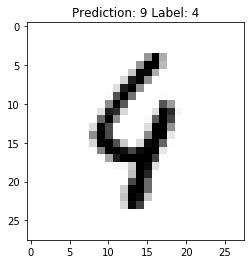

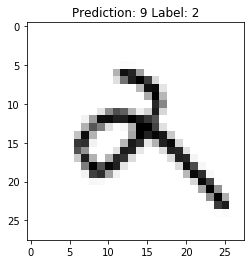

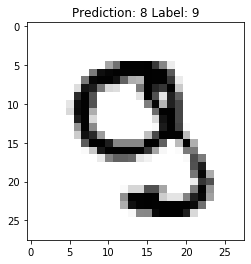

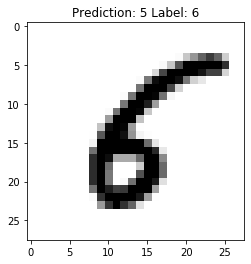

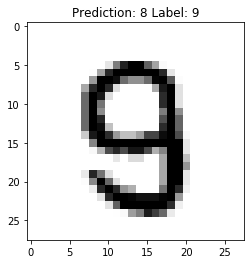

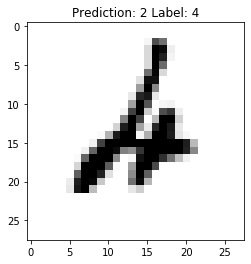

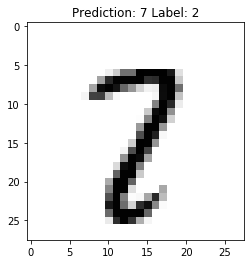

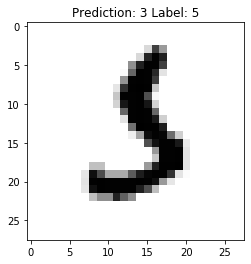

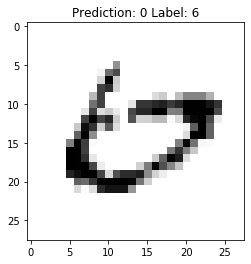

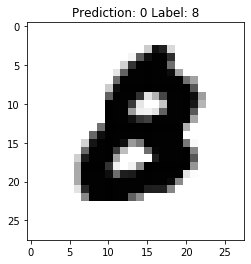

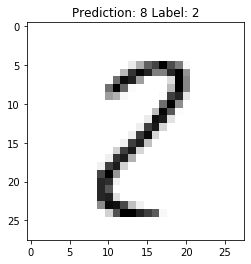

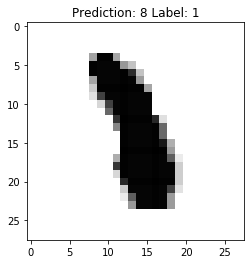

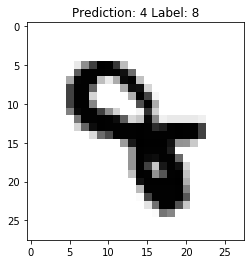

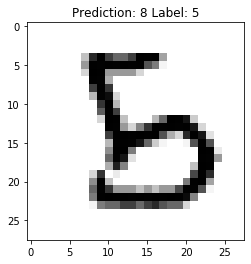

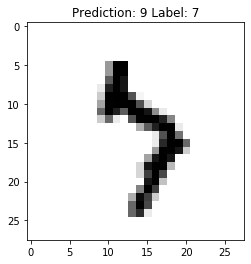

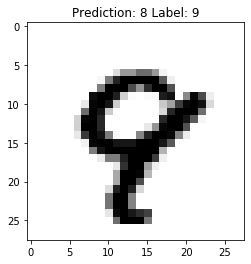

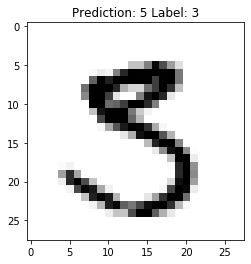

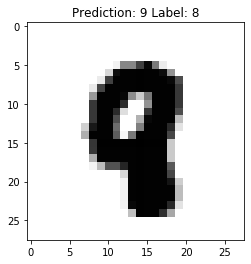

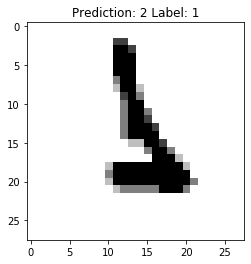

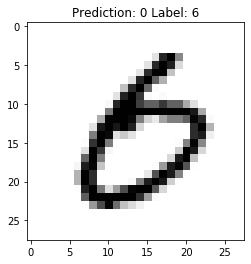

In [ ]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()

You can see most of the ones it's having trouble with, are images a human would have trouble with as well!
